In [31]:
#Importing python packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

QUESTION 1

In [32]:
#Setting Variables for question 1
weightsFP = '../data/module3Data/weights.tsv'
POUND_KILO = 0.453592

In [33]:
#1.1 Import TSV file Weights using Pandas package
weights = pd.read_csv(weightsFP, sep='\t', header=None)
weights.columns = ['Pounds']

In [34]:
#1.2 Convert Pounds to Kilogram and round to 2 decimal places
weights['Kilograms'] = round(weights * POUND_KILO,2)

In [35]:
#1.3 Find Mean, Median, and STD of both series objects using Numpy package
Mean = round(np.mean(weights),2)
poundsMedian = round(np.median(weights.Pounds),2)
kiloMedian = round(np.median(weights.Kilograms),2)
STD = round(np.std(weights),2)
print('Mean for Pounds: '+str(Mean['Pounds']),'\nMean for Kilograms: '+str(Mean['Kilograms']),
    '\nMedian Pounds: '+str(poundsMedian),'\nMedian Kilograms: '+str(kiloMedian),'\nSTD Pounds '+str(STD['Pounds']),
    '\nSTD Kilograms: '+str(STD['Kilograms']))

Mean for Pounds: 161.6 
Mean for Kilograms: 73.3 
Median Pounds: 160.5 
Median Kilograms: 72.8 
STD Pounds 15.06 
STD Kilograms: 6.83


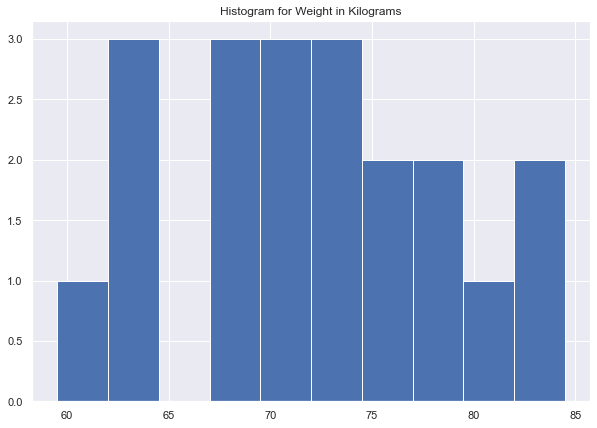

In [36]:
# 1.4 Plotting Histogram for Kilograms using matplotlib.pyplot package
plt.figure(figsize=(10,7))
hist1, edges1 = np.histogram(weights['Kilograms'], bins=10)
plt.title('Histogram for Weight in Kilograms')
plt.bar(edges1[:-1], hist1, width=edges1[1:]-edges1[:-1])
plt.show()

QUESTION 2

In [37]:
#Setting variables
bostonFP = '../data/module3Data/boston.csv'

In [38]:
# #2.1 Import boston file using pandas and use the shape attribute
boston = pd.read_csv(bostonFP)
print(f'Number of Rows: {boston.shape[0]}\nNumber of Columns: {boston.shape[1]}')

Number of Rows: 506
Number of Columns: 13


In [39]:
#2.2 Grabbing row with lowest NOX concentration using loc, then printing out the value of MEDV column for that row
noxMinRow = boston.loc[boston['NOX'] == boston['NOX'].min()]
print(f"Owner occupied home value for lowest nitric oxide concentration is: {noxMinRow['MEDV'].values[0]}")

Owner occupied home value for lowest nitric oxide concentration is: 20.1


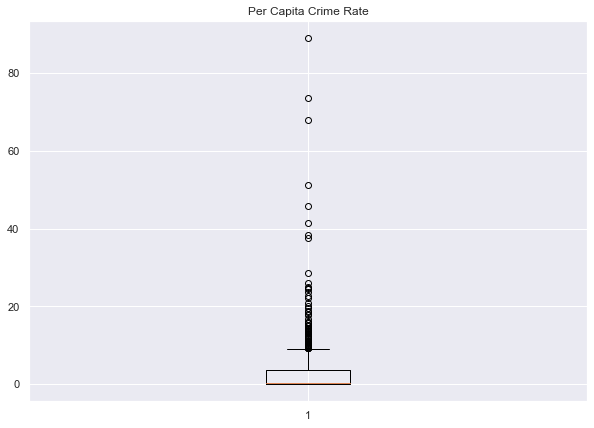

The CRIM IQR is: 3.5950375


In [40]:
#2.3 Creating boxplot using matplotlib and finding IQR using Pandas quantile attributes
plt.figure(figsize=(10,7))
plt.boxplot(boston['CRIM'])
plt.title('Per Capita Crime Rate')
plt.show()
bostonIQR = boston['CRIM'].quantile(0.75)-boston['CRIM'].quantile(0.25)
print(f'The CRIM IQR is: {bostonIQR}')

In [41]:
#2.4 Subsetting outliers and comparing mean Age
IQRdataBoston = boston['CRIM'].describe()
outlierCrimeValue = round(IQRdataBoston[6]+bostonIQR,2)
outlierBostonDf = boston[boston['CRIM']>outlierCrimeValue] 
print('bostonDF Mean Age: '+str(round(boston['AGE'].mean(),2)),"\nOutlierDF Mean Age: "+str(round(outlierBostonDf['AGE'].mean(),2)))

bostonDF Mean Age: 68.57 
OutlierDF Mean Age: 93.38


<Figure size 720x504 with 0 Axes>

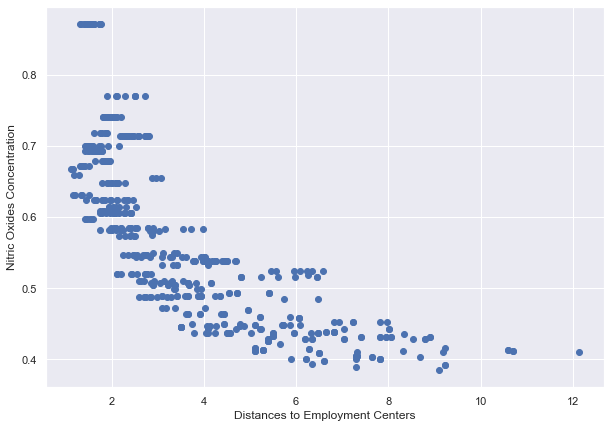

In [42]:
#2.5 Creating scatter plot for DIS & NOX
scatterFig = plt.figure()
plt.figure(figsize=(10,7))
plt.scatter(boston['DIS'],boston['NOX'])
plt.xlabel('Distances to Employment Centers')
plt.ylabel('Nitric Oxides Concentration')
plt.show()

<Figure size 720x504 with 0 Axes>

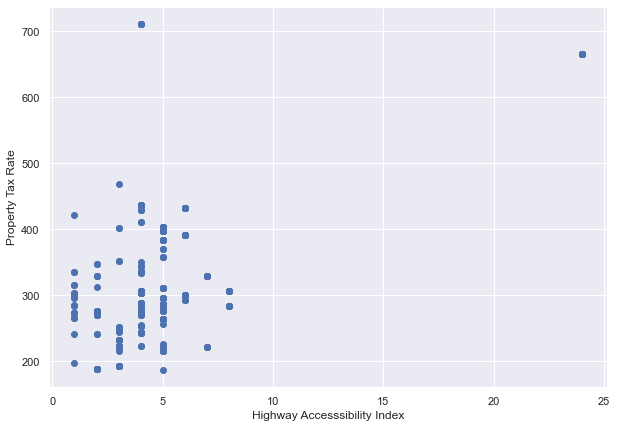

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


In [43]:
#2.6 Displaying scatterplot and correlation values for RAD & TAX
scatterFig = plt.figure()
plt.figure(figsize=(10,7))
plt.scatter(boston['RAD'],boston['TAX'])
plt.xlabel('Highway Accesssibility Index')
plt.ylabel('Property Tax Rate')
plt.show()

boston.loc[:,['RAD','TAX']].corr()

QUESTION 3

In [44]:
#Importing tips dataset from seaborn
tips_df = sns.load_dataset('tips')
print(tips_df['smoker'].count())

244


In [45]:
#3.1 Calculated and added tip percentage column
tips_df['tip_percent'] = round(tips_df['tip']/tips_df['total_bill']*100,2)
print(tips_df)

     total_bill   tip     sex smoker   day    time  size  tip_percent
0         16.99  1.01  Female     No   Sun  Dinner     2         5.94
1         10.34  1.66    Male     No   Sun  Dinner     3        16.05
2         21.01  3.50    Male     No   Sun  Dinner     3        16.66
3         23.68  3.31    Male     No   Sun  Dinner     2        13.98
4         24.59  3.61  Female     No   Sun  Dinner     4        14.68
..          ...   ...     ...    ...   ...     ...   ...          ...
239       29.03  5.92    Male     No   Sat  Dinner     3        20.39
240       27.18  2.00  Female    Yes   Sat  Dinner     2         7.36
241       22.67  2.00    Male    Yes   Sat  Dinner     2         8.82
242       17.82  1.75    Male     No   Sat  Dinner     2         9.82
243       18.78  3.00  Female     No  Thur  Dinner     2        15.97

[244 rows x 8 columns]


In [46]:
#3.2 Group By day to find Sunday has the highest mean bill total
tips_df.groupby(['day'])['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [47]:
#3.3 Creating two dataframes and joining to compare results
groupByTimeDF = tips_df.groupby(['time'],as_index=False)['size'].sum()

subsetSmoker = tips_df[tips_df['smoker']=='Yes']

groupBySmokerDF = subsetSmoker.groupby(['time'],as_index=False)['smoker'].count()

joinedGroupBy = groupByTimeDF.join(groupBySmokerDF.set_index('time'),on='time')

joinedGroupBy['smoker_percent'] = round(joinedGroupBy['smoker']/joinedGroupBy['size']*100,2)

print(joinedGroupBy)


     time  size  smoker  smoker_percent
0   Lunch   164      23           14.02
1  Dinner   463      70           15.12


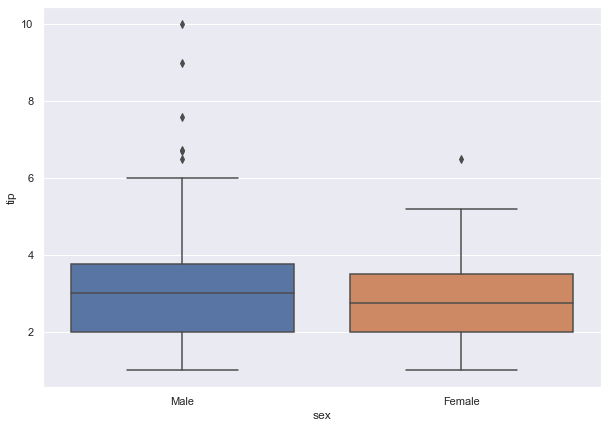

In [48]:
#3.4
sns.set(rc={'figure.figsize':(10,7)})
tipByGender = sns.boxplot(x="sex", y="tip", data=tips_df)

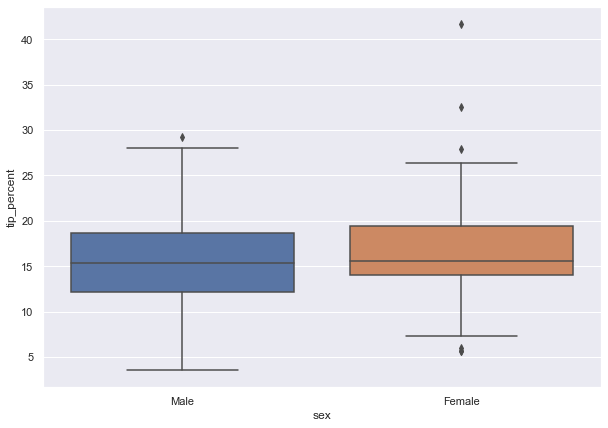

In [49]:
#3.5
sns.set(rc={'figure.figsize':(10,7)})
subsetTipPercent = tips_df[tips_df['tip_percent']<70]
tipPercentByGender = sns.boxplot(x="sex", y="tip_percent", data=subsetTipPercent)

QUESTION 4

In [50]:
#Set filepath for avocado.csv
avocadoFP = '../data/module3Data/avocado.csv'

In [51]:
#Import Avocado.csv using Pandas
avocado = pd.read_csv(avocadoFP)

In [52]:
#4.1 Displaying total amount of missing values and handling the missing values
avocado.isnull().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year            196
Region          169
dtype: int64

In [53]:
#Filling Year
avocado.loc[avocado['Year'].isnull() & avocado['Date'].notnull(), 'Year'] = avocado['Date'].str[:4]
avocado.isnull().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year              2
Region          169
dtype: int64

In [54]:
#dropping Date
droppedDate = avocado.loc[:,['AveragePrice','TotalVolume','Small','Large','AllSizes','TotalBags','Type','Year','Region']]
droppedDate.isnull().sum()

AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year              2
Region          169
dtype: int64

In [55]:
#Filling TotalVolume using following logic --> TotalVolume = Small + Large + AllSizes + TotalBags
droppedDate.loc[droppedDate['TotalVolume'].isnull() & droppedDate['Small'].notnull() & droppedDate['Large'].notnull() & droppedDate['AllSizes'].notnull() 
& droppedDate['TotalBags'].notnull(), 'TotalVolume'] = droppedDate['Small'] + droppedDate['Large'] + droppedDate['AllSizes'] + droppedDate['TotalBags']

In [56]:
#Filling columns  by taking difference --> ex Small = TotalVolume - Large + AllSizes + TotalBags
droppedDate.loc[droppedDate['Small'].isnull() & droppedDate['TotalVolume'].notnull() & droppedDate['Large'].notnull() & droppedDate['AllSizes'].notnull() 
& droppedDate['TotalBags'].notnull(), 'Small'] = droppedDate['TotalVolume'] - droppedDate['Large'] + droppedDate['AllSizes'] + droppedDate['TotalBags']

droppedDate.loc[droppedDate['Large'].isnull() & droppedDate['TotalVolume'].notnull() & droppedDate['Small'].notnull() & droppedDate['AllSizes'].notnull() 
& droppedDate['TotalBags'].notnull(), 'Large'] = droppedDate['TotalVolume'] - droppedDate['Small'] + droppedDate['AllSizes'] + droppedDate['TotalBags']

droppedDate.loc[droppedDate['AllSizes'].isnull() & droppedDate['TotalVolume'].notnull() & droppedDate['Large'].notnull() & droppedDate['Small'].notnull() 
& droppedDate['TotalBags'].notnull(), 'AllSizes'] = droppedDate['TotalVolume'] - droppedDate['Large'] + droppedDate['Small'] + droppedDate['TotalBags']

droppedDate.loc[droppedDate['TotalBags'].isnull() & droppedDate['TotalVolume'].notnull() & droppedDate['Large'].notnull() & droppedDate['AllSizes'].notnull() 
& droppedDate['Small'].notnull(), 'TotalBags'] = droppedDate['TotalVolume'] - droppedDate['Large'] + droppedDate['AllSizes'] + droppedDate['Small']

In [93]:
typeMean = round(droppedDate.groupby(['Type'])['AveragePrice'].mean(),2)
typeMean

Type
conventional    1.16
organic         1.66
Name: AveragePrice, dtype: float64

In [91]:
droppedDate.loc[droppedDate['Type'].isnull() & droppedDate['AveragePrice'].notnull() & droppedDate['AveragePrice'].ge(typeMean[1]), 'Type'] = 'organic'
droppedDate.loc[droppedDate['Type'].isnull() & droppedDate['AveragePrice'].notnull() & droppedDate['AveragePrice'].lt(typeMean[1]), 'Type'] = 'conventional'

In [94]:
droppedDate.loc[droppedDate['AveragePrice'].isnull() & droppedDate['Type'].notnull() & droppedDate['Type'].eq('organic'), 'AveragePrice'] = typeMean[1]
droppedDate.loc[droppedDate['AveragePrice'].isnull() & droppedDate['Type'].notnull() & droppedDate['Type'].eq('conventional'), 'AveragePrice'] = typeMean[0]

In [95]:
droppedDate.isnull().sum()

AveragePrice      3
TotalVolume       7
Small             5
Large             6
AllSizes         10
TotalBags        10
Type              3
Year              2
Region          169
dtype: int64

In [99]:
droppedDate.groupby(['Region']).mean()

,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags
Region,,,,,,
Albany,1.558160,4.751629e+04,2.120457e+03,3.766200e+04,335.938631,8.024286e+03
Atlanta,1.339880,2.625757e+05,1.462819e+05,3.475084e+04,9384.009880,8.631074e+04
BaltimoreWashington,1.533482,4.019957e+05,4.085699e+04,2.484156e+05,12581.275595,1.071261e+05
Boise,1.343851,4.274216e+04,2.050619e+04,3.483971e+03,3480.449701,1.600722e+04
Boston,1.528318,2.907602e+05,5.109451e+03,2.181820e+05,6570.761657,6.406953e+04
BuffaloRochester,1.514595,6.844435e+04,3.087778e+03,3.205111e+04,707.438829,3.468188e+04
California,1.398507,3.033764e+06,1.192011e+06,1.049782e+06,108564.274611,7.346837e+05
Charlotte,1.605994,1.049030e+05,2.230877e+04,3.829044e+04,13431.464392,3.515880e+04
Chicago,1.556907,3.939700e+05,3.645261e+04,2.536574e+05,60218.502216,4.979947e+04
